# Intrusion Detection Data Generation with GAN

## Install Dependencies and prepare Train, Test Sets

In [2]:
!pip install ctgan
!pip install table_evaluator
!pip install numpy
!pip install gdown
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from table_evaluator import TableEvaluator

IPython not installed.


In [14]:
!gdown 1y0zyTfNcxRMJIsVEw_I09OTzTpl5N5fb

Downloading...
From: https://drive.google.com/uc?id=1y0zyTfNcxRMJIsVEw_I09OTzTpl5N5fb
To: /Users/tarunannapareddy/Desktop/code/CTGAN/mainSimulationAccessTraces.csv
100%|██████████████████████████████████████| 60.8M/60.8M [00:03<00:00, 18.1MB/s]


In [3]:
data = pd.read_csv('./mainSimulationAccessTraces.csv')
# Split the data into 80% train and 20% remaining (test)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

# Split the remaining 20% into 50% validation and 50% test (10% each of total data)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
categorical_columns = ['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
                       'destinationServiceAddress', 'destinationServiceType', 'destinationLocation',
                       'accessedNodeAddress', 'accessedNodeType', 'operation', 'normality']
print(train_data.dtypes)

sourceID                     object
sourceAddress                object
sourceType                   object
sourceLocation               object
destinationServiceAddress    object
destinationServiceType       object
destinationLocation          object
accessedNodeAddress          object
accessedNodeType             object
operation                    object
value                        object
timestamp                     int64
normality                    object
dtype: object


## Train and Save GAN Model

In [7]:
# Ensure numerical columns are properly converted
train_data['value'] = pd.to_numeric(train_data['value'], errors='coerce')
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='ms')
train_data['timestamp'] = train_data['timestamp'].astype(int) / 10**9

# Drop or handle missing values
train_data = train_data.dropna()

In [17]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(train_data, categorical_columns, epochs = 500)

Gen. (-0.63) | Discrim. (-0.21): 100%|██████████| 500/500 [5:45:04<00:00, 41.41s/it]    


In [18]:
with open('ctgan_model.pkl', 'wb') as f:
    pickle.dump(ctgan, f)

## Load and Run Saved GAN Model

In [4]:
with open('ctgan_model.pkl', 'rb') as f:
    loaded_ctgan = pickle.load(f)

Note : In the below section we need to uncomment the timestamp conversion when creating dataset for training. 

In [5]:
samples = loaded_ctgan.sample(1000)
#samples['timestamp'] = (samples['timestamp'] * 10**9).astype(int) // 10**6

(35796, 13) (1000, 13)


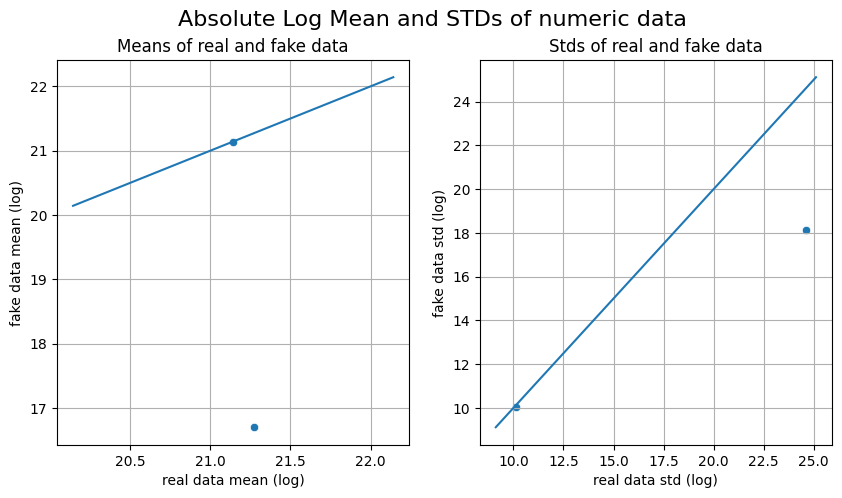

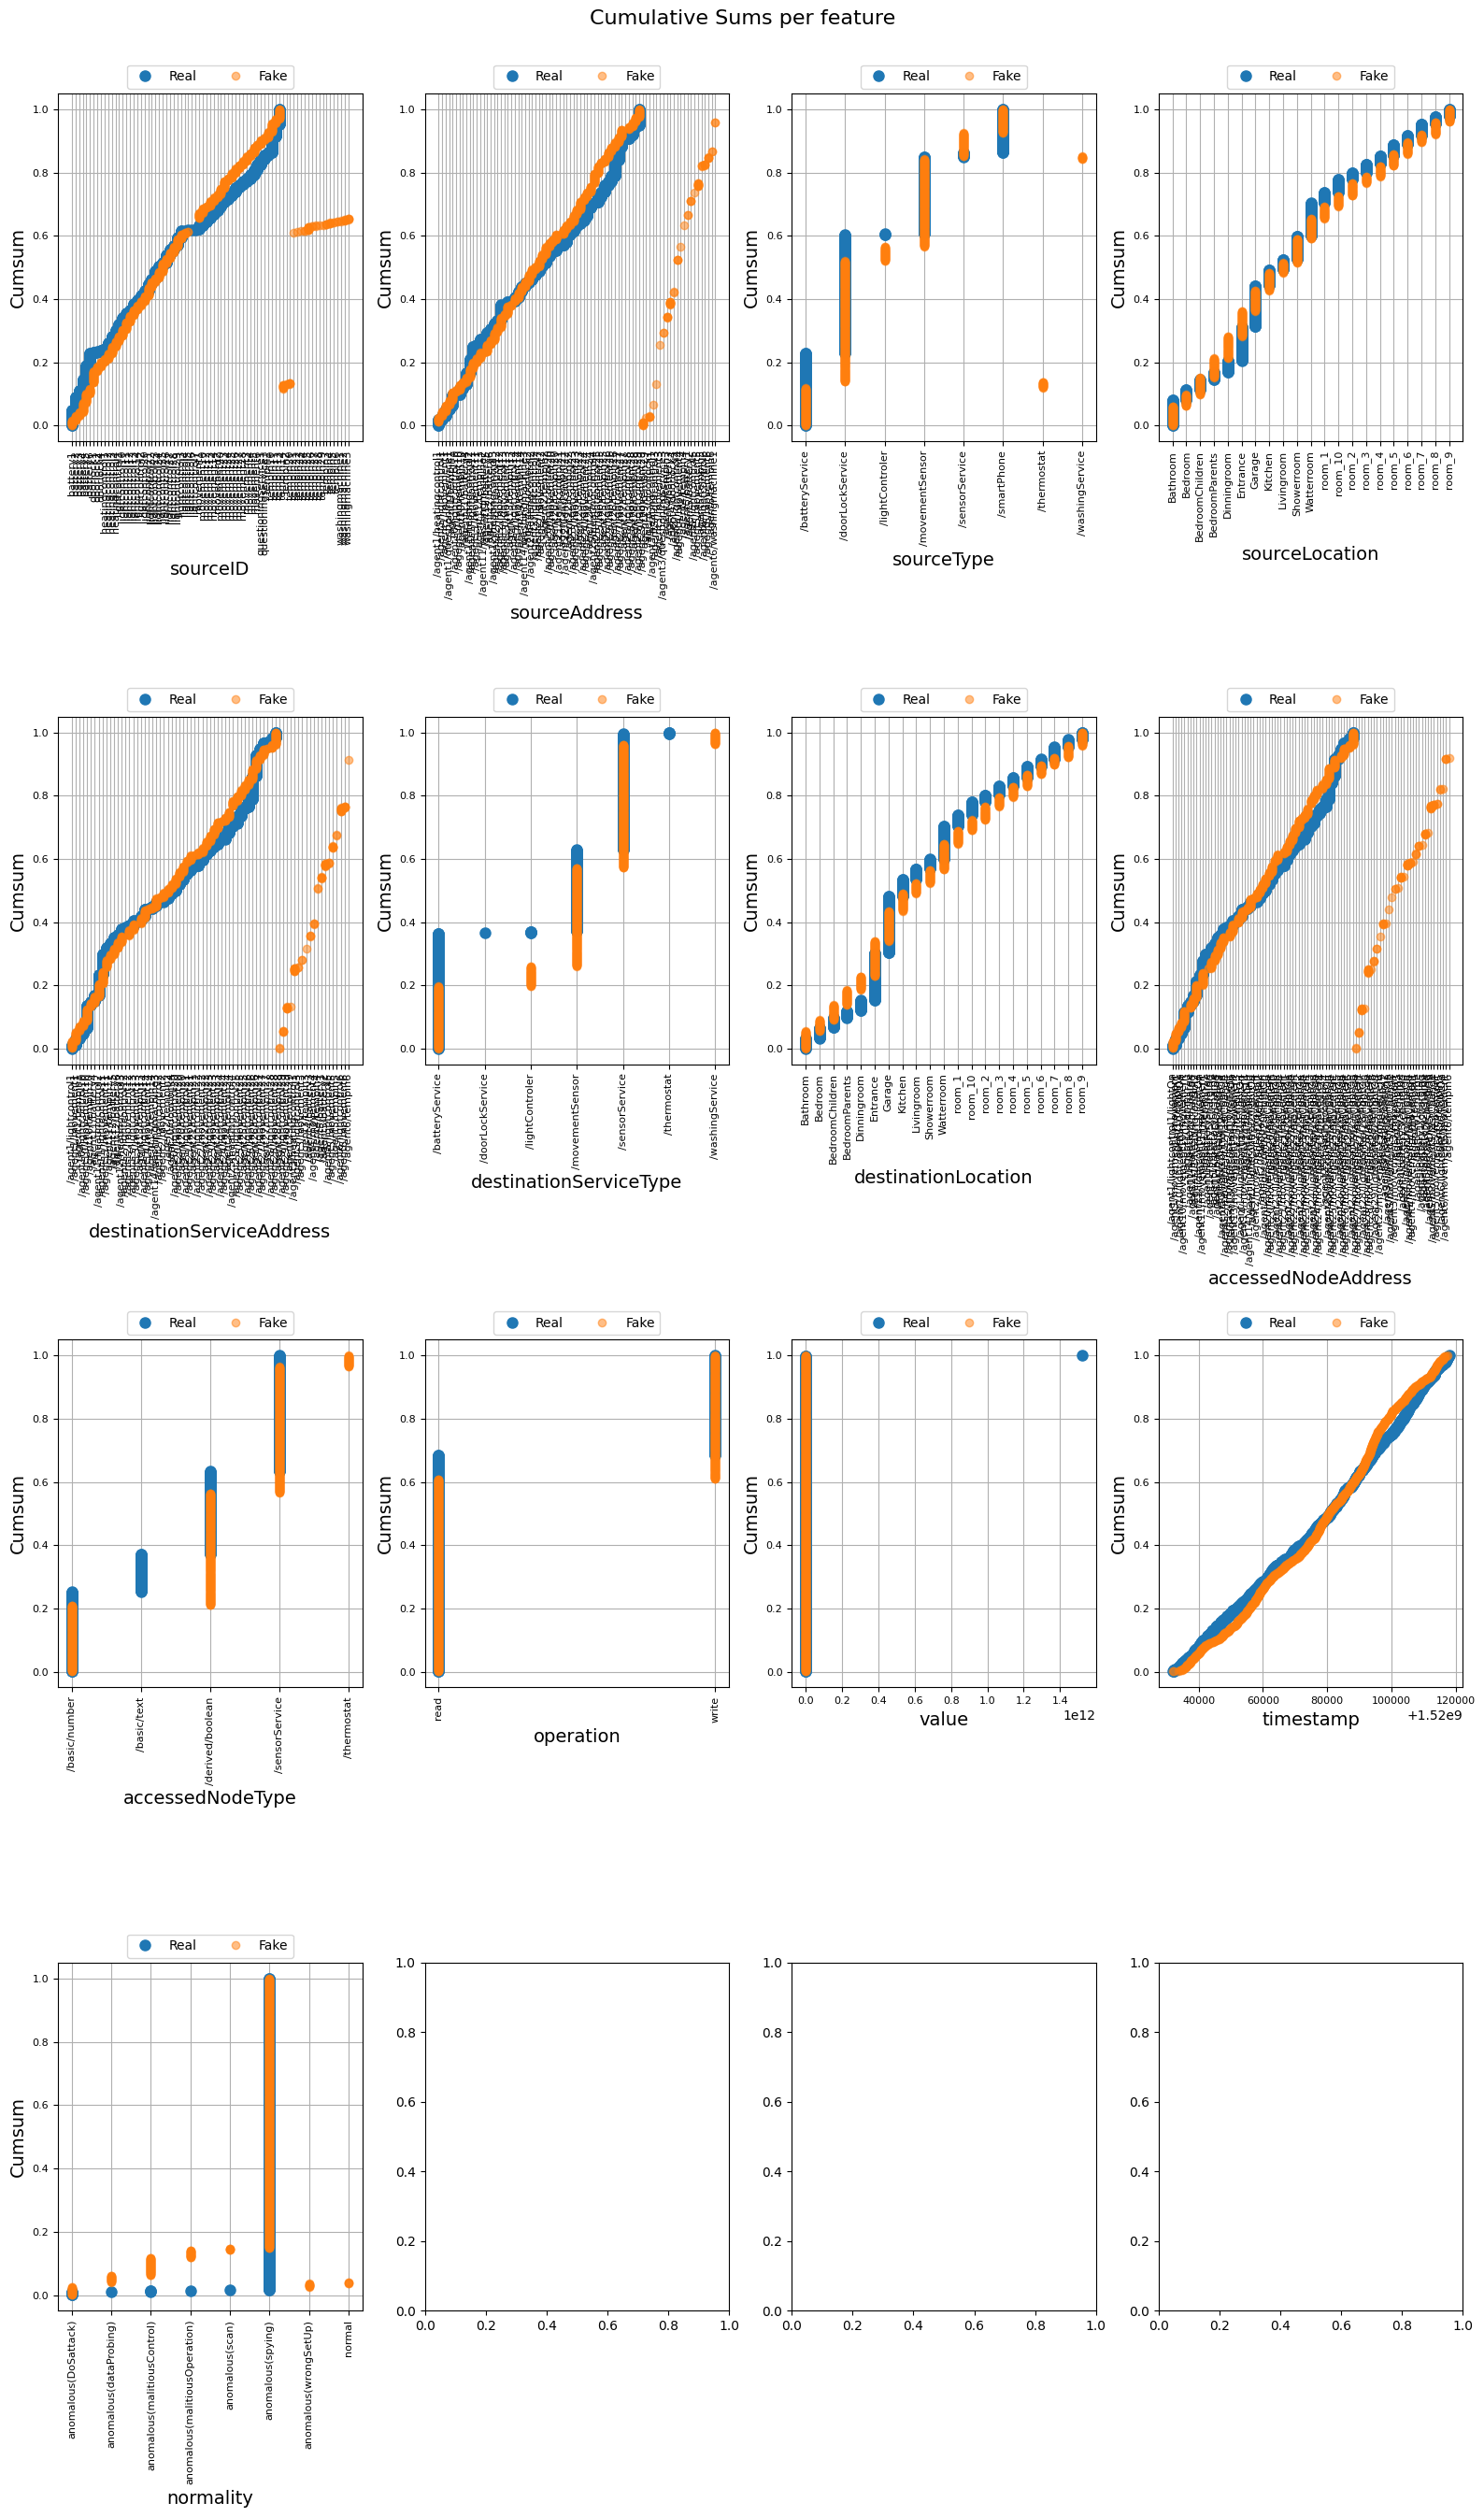

/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebre

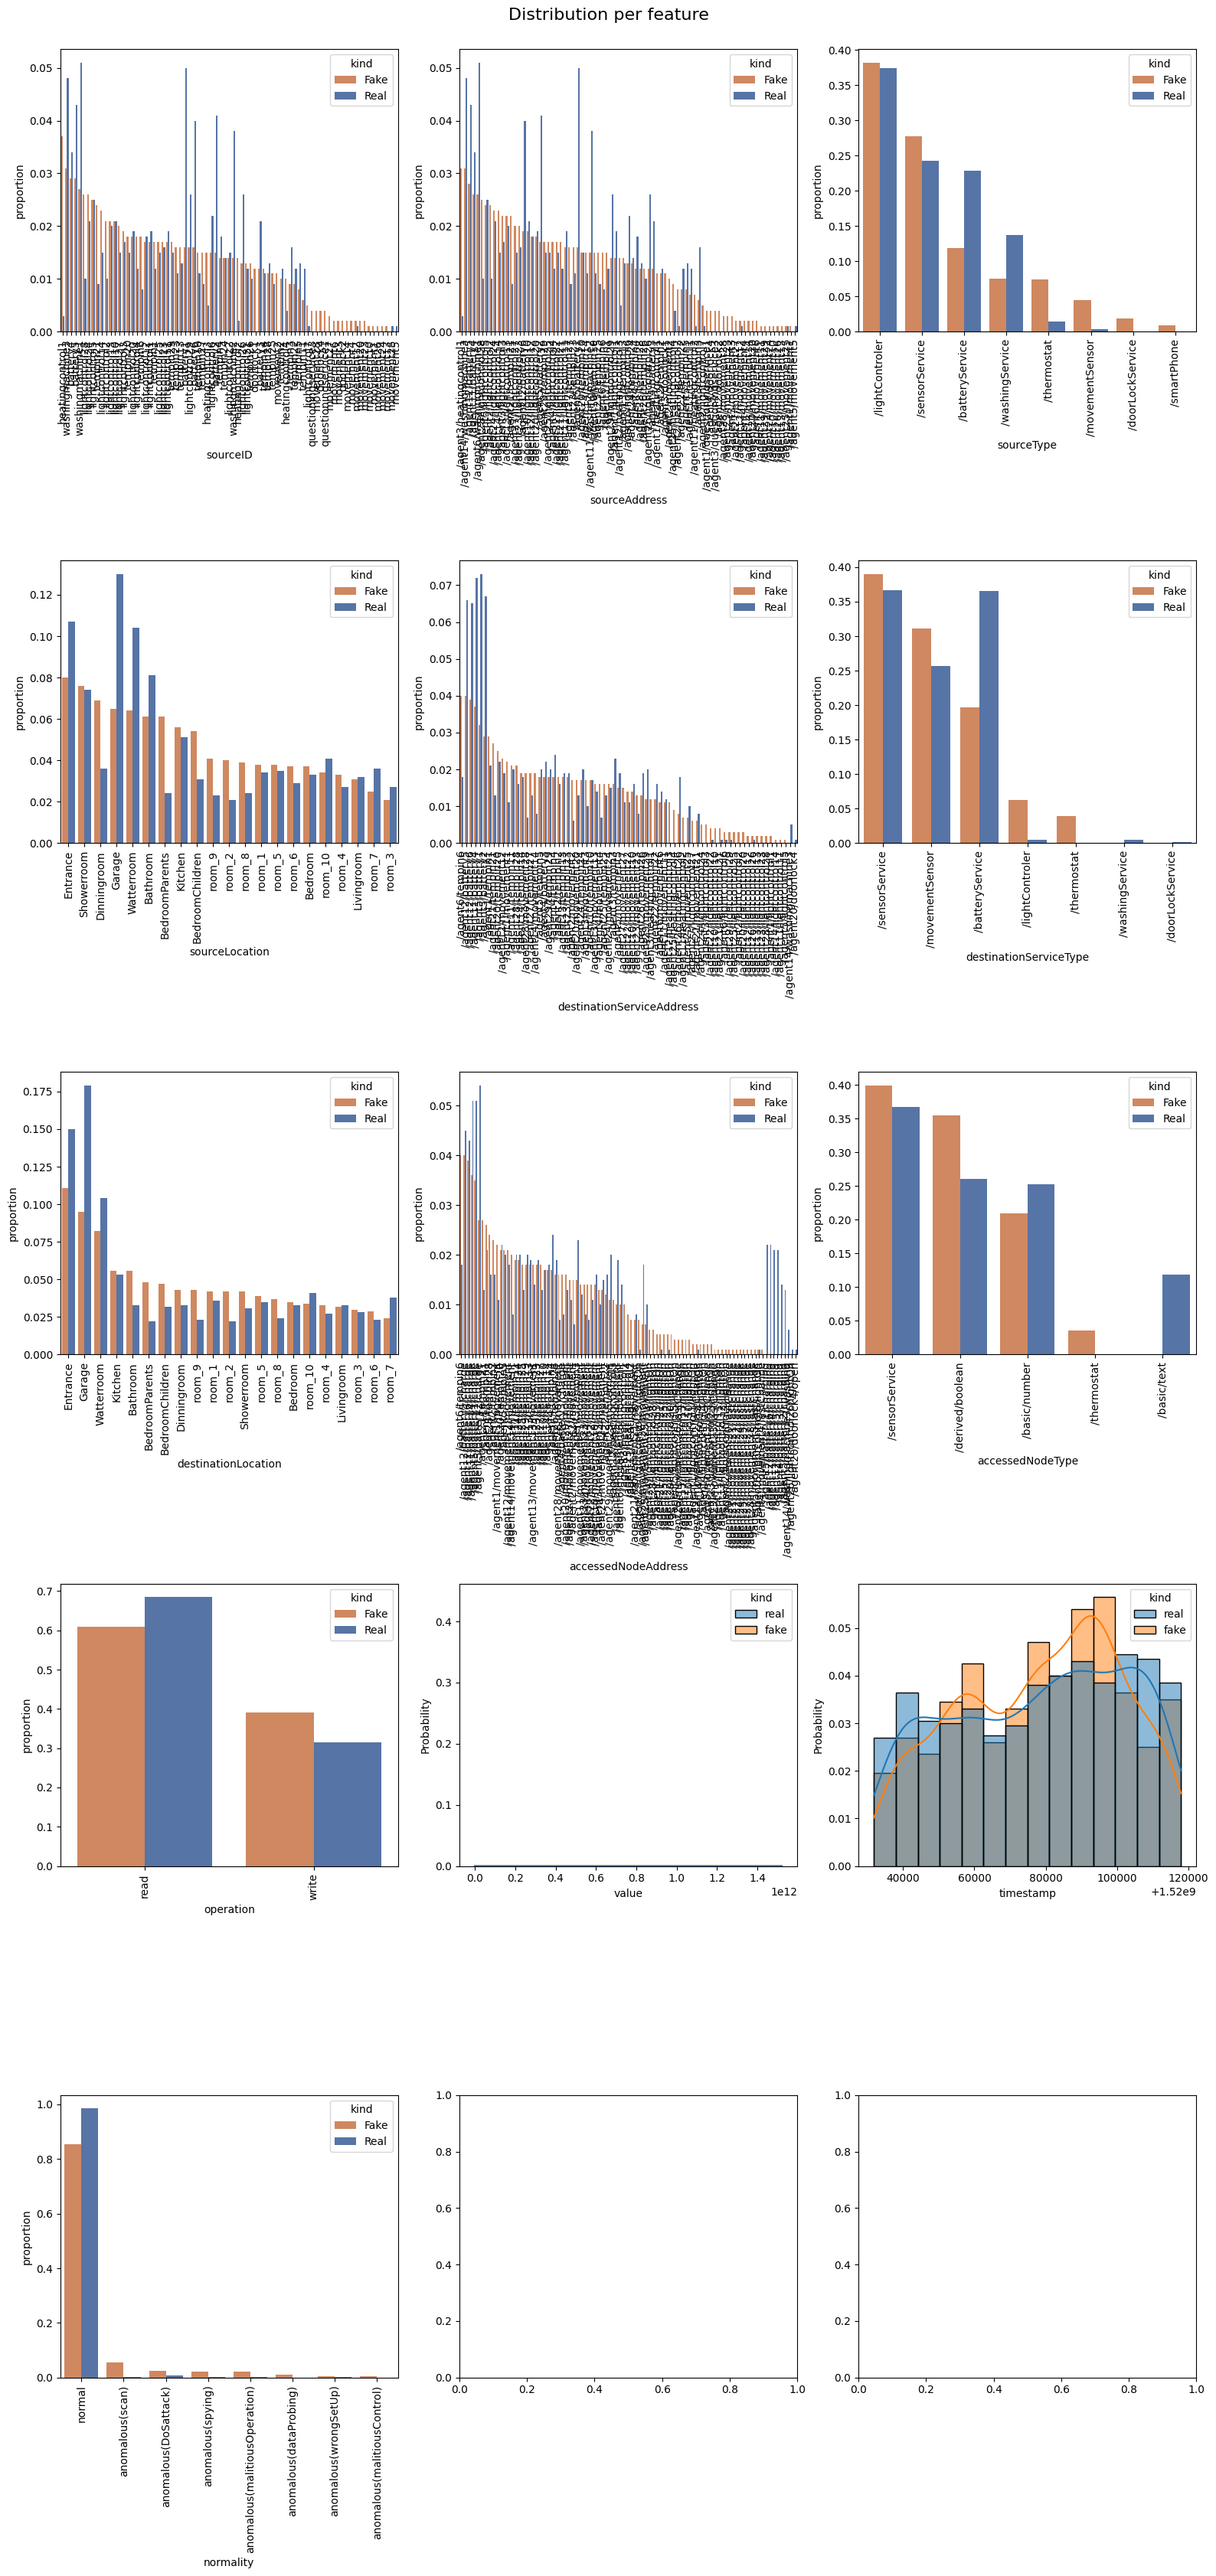

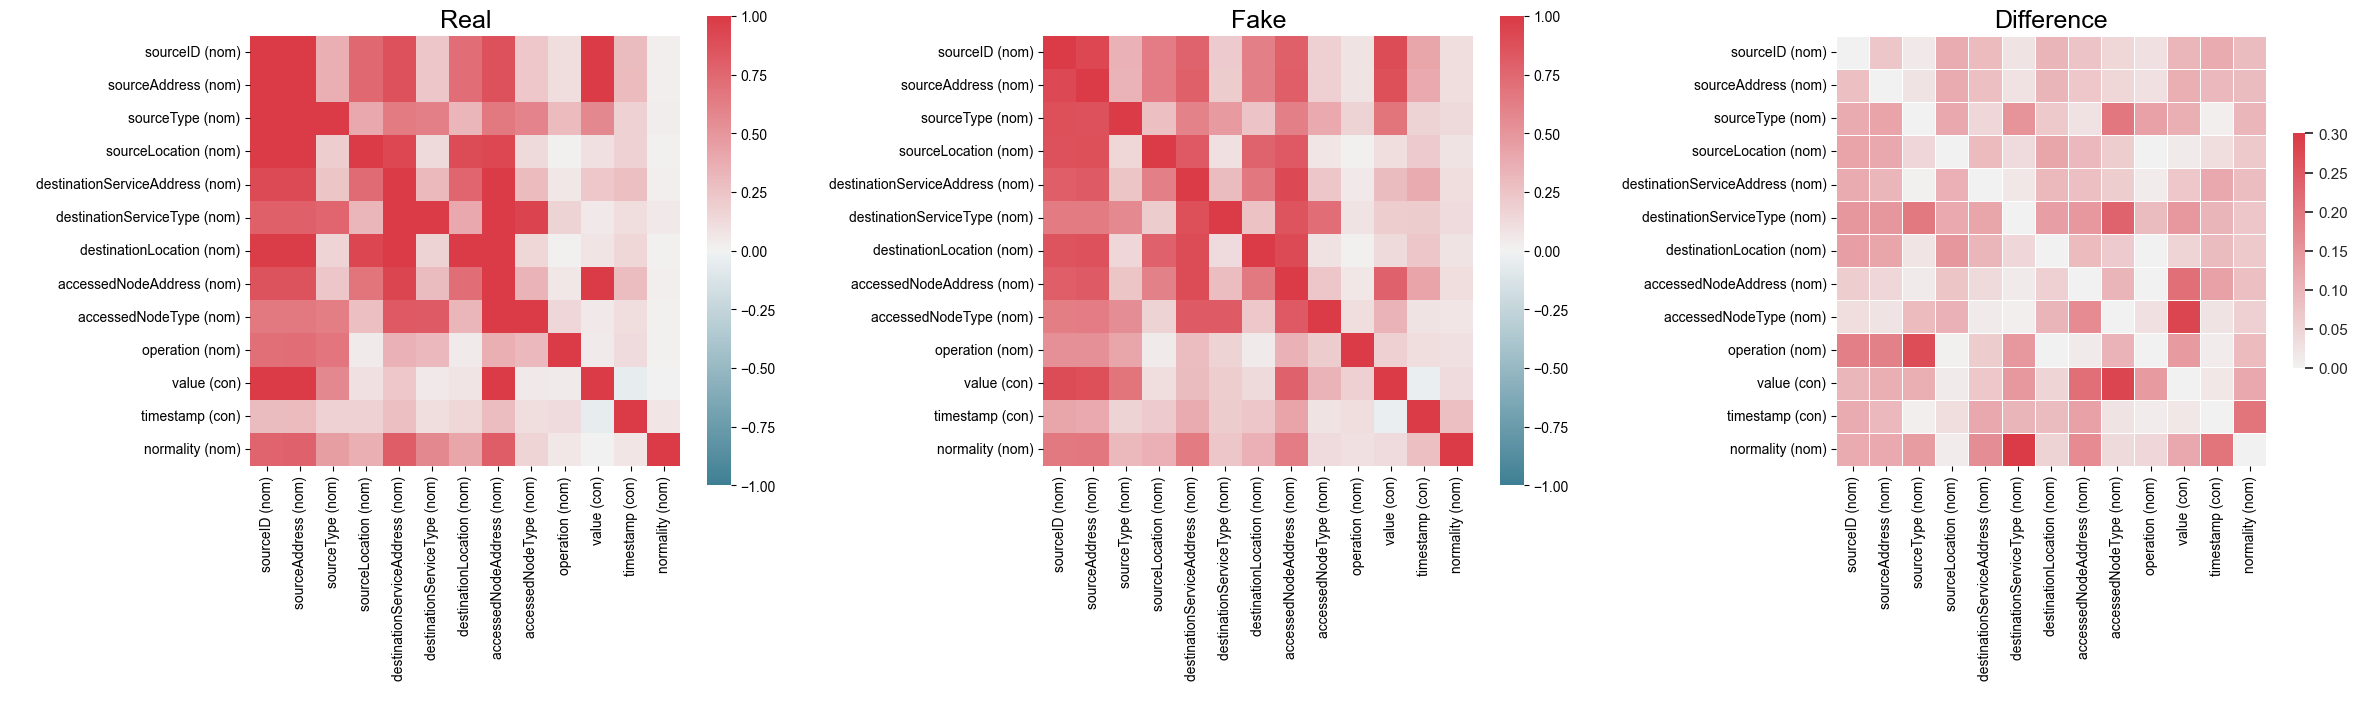

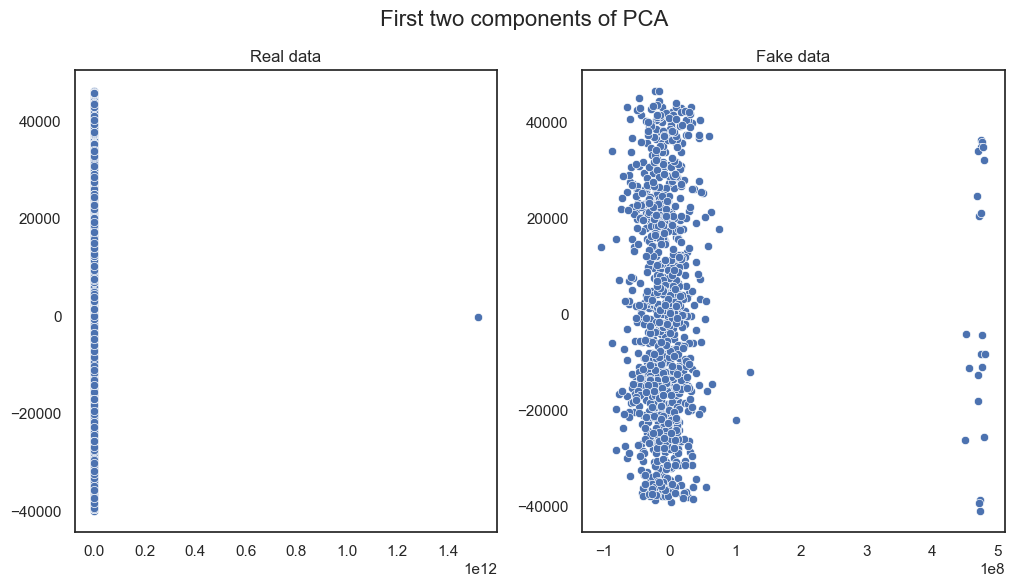

In [6]:
print(test_data.shape, samples.shape)
test_data['value'] = pd.to_numeric(test_data['value'], errors='coerce')
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], unit='ms')
test_data['timestamp'] = test_data['timestamp'].astype(int) / 10**9

table_evaluator =  TableEvaluator(test_data, samples, cat_cols= categorical_columns)

table_evaluator.visual_evaluation()